In [52]:
%%time
import psi4
import numpy as np
psi4.core.set_output_file('output.dat', False)



CPU times: user 197 µs, sys: 11 µs, total: 208 µs
Wall time: 831 µs


In [53]:
%%time
#! Sample HF/cc-pVDZ H2O Computation
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')


CPU times: user 283 ms, sys: 7 ms, total: 290 ms
Wall time: 297 ms


-76.02663273509017

In [54]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

CPU times: user 276 ms, sys: 4.68 ms, total: 280 ms
Wall time: 284 ms


-38.925334628937065

In [55]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

Optimizer: Optimization complete!
CPU times: user 1.78 s, sys: 31.5 ms, total: 1.81 s
Wall time: 1.83 s


In [56]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

CPU times: user 3.83 s, sys: 255 ms, total: 4.08 s
Wall time: 4.17 s


-0.0022355823909805178

In [57]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2
ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))
    


CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            2.5                        0.758605
            3.0                        0.015968
            4.0                        -0.016215
CPU times: user 5.33 s, sys: 1.53 s, total: 6.86 s
Wall time: 7.44 s


In [59]:
%%time
#! Example potential energy surface scan and CP-correction for Ar2
Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5, 6.0, 0.1)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))
    

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.6                        0.037518
            3.7                        -0.042931
            3.8                        -0.089134
            3.9                        -0.113090
            4.0                        -0.122889
            4.1                        -0.123921
            4.2                        -0.119738
            4.3                        -0.112652
            4.4                        -0.104146
            4.5                        -0.095152
            4.6                        -0.086236
            4.7                        -0.077730
            4.8                        -0.069808
            4.9                        -0.062548
            5.0                        -0.055968
            5.1                        -0.0500

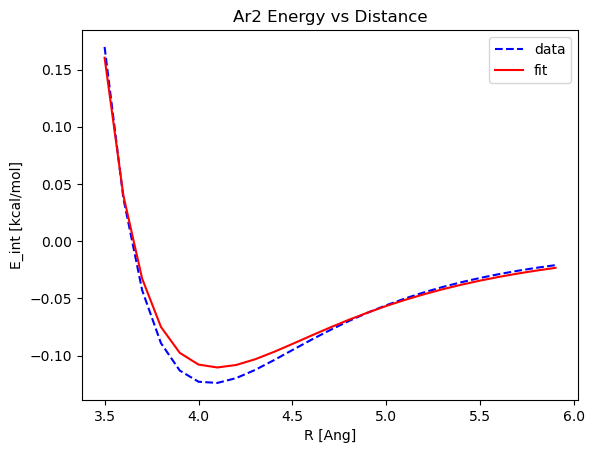

In [89]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# define lennard jones potential
def lj(r, eps, sig):
    return 4*eps*((sig/r)**12 - (sig/r)**6)

#define the data to be fit with some noise
xdata = Rvals
y = np.array([ecp[R] for R in Rvals])
ydata = y * psi4.constants.hartree2kcalmol
yerr = 0.2 * np.random.normal(size=xdata.size)

# fit the data
popt, pcov = curve_fit(lj, xdata, ydata, sigma=yerr)

# plot the data and the best fit
plt.plot(xdata, ydata, 'b--', label='data')
plt.plot(xdata, lj(xdata, *popt), 'r-', label='fit')
plt.title('Ar2 Energy vs Distance')
plt.xlabel('R [Ang]')
plt.ylabel('E_int [kcal/mol]')
plt.legend()

plt.show()